In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1CQAOCneG14yRdGot0fYyuMzNi0Yux4MJ

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1CQAOCneG14yRdGot0fYyuMzNi0Yux4MJ
To: /content/covid.csv
100% 258/258 [00:00<00:00, 1.09MB/s]


In [3]:
df = pd.read_csv('/content/covid.csv')
df

,Fever,Cough,Breathing issues,Infected
0,No,No,No,No
1,Yes,Yes,Yes,Yes
2,Yes,Yes,No,No
3,Yes,No,Yes,Yes
4,Yes,Yes,Yes,Yes
5,No,Yes,No,No
6,Yes,No,Yes,Yes
7,Yes,No,Yes,Yes
8,No,Yes,Yes,Yes
9,Yes,Yes,No,Yes


In [4]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))


def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [5]:
a = information_gain(df, 'Fever', 'Infected')
b = information_gain(df, 'Cough', 'Infected')
c = information_gain(df, 'Breathing issues', 'Infected')

print(f"IG_Fever: {a}")
print(f"IG_Cough: {b}")
print(f"IG_Breathing_Issues: {c}")

IG_Fever: 0.12808527889139443
IG_Cough: 0.0391486719030707
IG_Breathing_Issues: 0.39603884492804464


In [6]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'



In [7]:
def make_tree(data, target):

  if (len(data[target].unique()) == 1 or len(data.columns) == 1):
    return Node(label = data[target].iloc[0])

  # Calculate IG
  features = data.drop(target, axis=1).columns
  gains = [information_gain(data, feature, target) for feature in features]

  # Greedy Search for findinf Best Feature
  max_gain_idx = np.argmax(gains)
  best_feature = features[max_gain_idx]

  # Make a Node
  node = Node(feature = best_feature)

  # Loop over the Best Feature
  for value in data[best_feature].unique():
    subset = data[data[best_feature] == value].drop(best_feature, axis=1)
    display(subset)

    node.children[value] = make_tree(subset, target)

  return node


In [8]:
tree = make_tree(df, 'Infected')
tree

,Fever,Cough,Infected
0,No,No,No
2,Yes,Yes,No
5,No,Yes,No
9,Yes,Yes,Yes
10,No,Yes,No
13,Yes,Yes,No


,Cough,Infected
0,No,No
5,Yes,No
10,Yes,No


,Cough,Infected
2,Yes,No
9,Yes,Yes
13,Yes,No


,Infected
2,No
9,Yes
13,No


,Fever,Cough,Infected
1,Yes,Yes,Yes
3,Yes,No,Yes
4,Yes,Yes,Yes
6,Yes,No,Yes
7,Yes,No,Yes
8,No,Yes,Yes
11,No,Yes,Yes
12,No,Yes,No


,Cough,Infected
1,Yes,Yes
3,No,Yes
4,Yes,Yes
6,No,Yes
7,No,Yes


,Cough,Infected
8,Yes,Yes
11,Yes,Yes
12,Yes,No


,Infected
8,Yes
11,Yes
12,No


DecisionNode(feature="Breathing issues", children={'No': DecisionNode(feature="Fever", children={'No': LeafNode(label="No"), 'Yes': DecisionNode(feature="Cough", children={'Yes': LeafNode(label="No")})}), 'Yes': DecisionNode(feature="Fever", children={'Yes': LeafNode(label="Yes"), 'No': DecisionNode(feature="Cough", children={'Yes': LeafNode(label="Yes")})})})

In [9]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree

In [11]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1reEl49aLUDMe6cjKzbpJ1sxuE_ySw6DS

Downloading...
From: https://drive.google.com/uc?id=1reEl49aLUDMe6cjKzbpJ1sxuE_ySw6DS
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 20.9MB/s]


In [12]:
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [13]:
df1 = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first = True)
df2 = df1.replace({'Drug' : {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY':4 }})

col = df2.pop('Drug')
df2.insert(len(df2.columns), 'Drug', col)
df2

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,23,25.355,0,0,0,0,4
1,47,13.093,1,1,0,0,2
2,47,10.114,1,1,0,0,2
3,28,7.798,0,0,1,0,3
4,61,18.043,0,1,0,0,4
...,...,...,...,...,...,...,...
195,56,11.567,0,1,0,0,2
196,16,12.006,1,1,0,0,2
197,52,9.894,1,0,1,0,3
198,23,14.020,1,0,1,1,3


In [14]:
X = df2.iloc[:,:-1]
y = df2.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle = True, random_state=83)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(170, 6) (170,) (30, 6) (30,)


In [15]:
model = tree.DecisionTreeClassifier(random_state = 83, max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=83)

[Text(0.6666666666666666, 0.875, 'x[1] <= 14.829\ngini = 0.672\nsamples = 170\nvalue = [19, 11, 12, 46, 82]'),
 Text(0.5, 0.625, 'x[4] <= 0.5\ngini = 0.646\nsamples = 88\nvalue = [19, 11, 12, 46, 0]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= 0.5\ngini = 0.738\nsamples = 58\nvalue = [19, 11, 12, 16, 0]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.464\nsamples = 30\nvalue = [19, 11, 0, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.49\nsamples = 28\nvalue = [0, 0, 12, 16, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 0, 30, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 82\nvalue = [0, 0, 0, 0, 82]')]

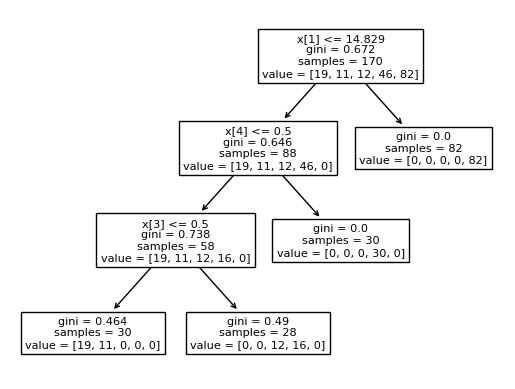

In [16]:
tree.plot_tree(model)

In [17]:
model.predict(x_test)
s1 = model.score(x_train, y_train)
s2 = model.score(x_test, y_test)

print(f"Train Accuracy: {s1}")
print(f"Test Accuracy: {s2}")

Train Accuracy: 0.8647058823529412
Test Accuracy: 0.7


In [18]:
model2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, ccp_alpha = 0.1, random_state = 83)
model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=4,
                       random_state=83)

[Text(0.75, 0.9, 'x[1] <= 14.829\nentropy = 1.897\nsamples = 170\nvalue = [19, 11, 12, 46, 82]'),
 Text(0.625, 0.7, 'x[4] <= 0.5\nentropy = 1.734\nsamples = 88\nvalue = [19, 11, 12, 46, 0]'),
 Text(0.5, 0.5, 'x[3] <= 0.5\nentropy = 1.965\nsamples = 58\nvalue = [19, 11, 12, 16, 0]'),
 Text(0.25, 0.3, 'x[0] <= 51.5\nentropy = 0.948\nsamples = 30\nvalue = [19, 11, 0, 0, 0]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.75, 0.3, 'x[5] <= 0.5\nentropy = 0.985\nsamples = 28\nvalue = [0, 0, 12, 16, 0]'),
 Text(0.625, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.875, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]'),
 Text(0.75, 0.5, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 0, 30, 0]'),
 Text(0.875, 0.7, 'entropy = 0.0\nsamples = 82\nvalue = [0, 0, 0, 0, 82]')]

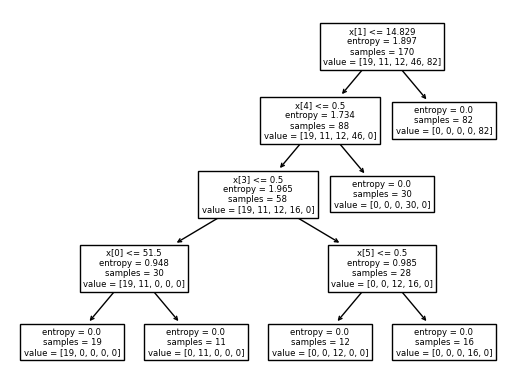

In [19]:
tree.plot_tree(model2)

In [20]:
s1 = model2.score(x_train, y_train)
s2 = model2.score(x_test, y_test)

print(f"Train Accuracy: {s1}")
print(f"Test Accuracy: {s2}")


Train Accuracy: 1.0
Test Accuracy: 0.9666666666666667


In [22]:
txt = tree.export_text(model2)
txt

'|--- feature_1 <= 14.83\n|   |--- feature_4 <= 0.50\n|   |   |--- feature_3 <= 0.50\n|   |   |   |--- feature_0 <= 51.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- feature_0 >  51.50\n|   |   |   |   |--- class: 1\n|   |   |--- feature_3 >  0.50\n|   |   |   |--- feature_5 <= 0.50\n|   |   |   |   |--- class: 2\n|   |   |   |--- feature_5 >  0.50\n|   |   |   |   |--- class: 3\n|   |--- feature_4 >  0.50\n|   |   |--- class: 3\n|--- feature_1 >  14.83\n|   |--- class: 4\n'

In [21]:
#First sample
i = 5
print(f"x_example: {x_test.iloc[i]}")
print(f"\ny_example: {y_test.iloc[i]}")

p1 = model2.predict(x_test.iloc[[i]])
print(f"\nPrediction: {p1}")

path = model2.decision_path(x_test.iloc[[i]])
print(f"Path: {path.toarray()}")

x_example: Age                   59.000
Na_to_K               10.444
Sex_M                  0.000
BP_LOW                 1.000
BP_NORMAL              0.000
Cholesterol_NORMAL     0.000
Name: 158, dtype: float64

y_example: 2

Prediction: [2]
Path: [[1 1 1 0 0 0 1 1 0 0 0]]


In [23]:
#Second sample
i = 10
print(f"x_example: {x_test.iloc[i]}")
print(f"\ny_example: {y_test.iloc[i]}")

p1 = model2.predict(x_test.iloc[[i]])
print(f"\nPrediction: {p1}")

path = model2.decision_path(x_test.iloc[[i]])
print(f"Path: {path.toarray()}")

x_example: Age                   37.000
Na_to_K               23.091
Sex_M                  0.000
BP_LOW                 0.000
BP_NORMAL              0.000
Cholesterol_NORMAL     1.000
Name: 88, dtype: float64

y_example: 4

Prediction: [4]
Path: [[1 0 0 0 0 0 0 0 0 0 1]]


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree

In [25]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1VEyd3_LKC7vb4wuT5BQwFVprTgsZ8lLn

Downloading...
From: https://drive.google.com/uc?id=1VEyd3_LKC7vb4wuT5BQwFVprTgsZ8lLn
To: /content/Life Expectancy Data.csv
100% 333k/333k [00:00<00:00, 97.3MB/s]


In [26]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [27]:
df1 = df.dropna()
print(df1.isnull().sum())
df1

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [28]:
df2 = df1.drop( labels = 'Life expectancy ', axis = 1)
df2 = pd.get_dummies(df2, columns=['Country', 'Status'], drop_first = True)
X = df2.iloc[: , :]

Y = df1.iloc[:,3]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=83)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1319, 152) (1319,) (330, 152) (330,)


In [29]:
model1 = tree.DecisionTreeRegressor(max_depth = 12, ccp_alpha=0.001, random_state=83)
model1.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.001, max_depth=12, random_state=83)

[Text(0.5614273136590585, 0.9615384615384616, 'x[17] <= 0.56\nsquared_error = 77.259\nsamples = 1319\nvalue = 69.236'),
 Text(0.29577166547788875, 0.8846153846153846, 'x[12] <= 1.75\nsquared_error = 44.827\nsamples = 412\nvalue = 59.669'),
 Text(0.15161376604850213, 0.8076923076923077, 'x[1] <= 245.5\nsquared_error = 22.205\nsamples = 231\nvalue = 63.616'),
 Text(0.08389800285306705, 0.7307692307692307, 'x[12] <= 0.25\nsquared_error = 12.155\nsamples = 144\nvalue = 66.042'),
 Text(0.04511412268188302, 0.6538461538461539, 'x[13] <= 4846.176\nsquared_error = 10.172\nsamples = 70\nvalue = 67.863'),
 Text(0.03316690442225392, 0.5769230769230769, 'x[1] <= 202.0\nsquared_error = 7.85\nsamples = 63\nvalue = 67.279'),
 Text(0.01783166904422254, 0.5, 'x[18] <= 7.8\nsquared_error = 7.312\nsamples = 51\nvalue = 67.924'),
 Text(0.005706134094151213, 0.4230769230769231, 'x[16] <= 11.25\nsquared_error = 2.028\nsamples = 10\nvalue = 64.52'),
 Text(0.0028530670470756064, 0.34615384615384615, 'squared_

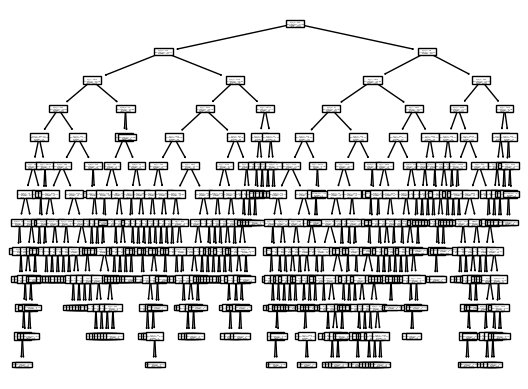

In [30]:
tree.plot_tree(model1)

In [31]:
s1 = model1.score(x_train, y_train)
s2 = model1.score(x_test, y_test)

print(f"Train Accuracy: {s1}")
print(f"Test Accuracy: {s2}")

Train Accuracy: 0.9912685853458939
Test Accuracy: 0.9278626919259654
